Objetivo Principal
Identificar padrões ou agrupamentos (clusters) nos dados de transações semanais de vendas usando diferentes algoritmos de clusterização. Isso pode ajudar a entender o comportamento dos clientes, identificar grupos de produtos com padrões de vendas semelhantes, prever tendências de vendas, ajustar o estoque com base nos padrões de vendas identificados ou otimizar estratégias de marketing.

Etapas do Projeto
Carregamento e Pré-processamento dos Dados

A base de dados Sales_Transactions_Dataset_Weekly.csv contém informações sobre vendas semanais.
O código remove colunas que começam com "Normalized", indicando que os dados normalizados serão recalculados posteriormente.
Os dados são escalados (normalizados) para garantir que todas as variáveis tenham a mesma influência nos algoritmos de clusterização.
Aplicação de Algoritmos de Clusterização

K-Means: Um algoritmo de clusterização baseado em centroides. O número de clusters (n_clusters) é determinado previamente.
DBSCAN: Um algoritmo baseado em densidade, que identifica clusters com base na proximidade dos pontos e na densidade local.
Agglomerative Clustering: Um algoritmo hierárquico que agrupa os dados de forma iterativa, com diferentes métodos de ligação (linkage).
Avaliação dos Resultados

O código calcula o Silhouette Score para cada algoritmo, que mede a qualidade dos clusters formados.
Os resultados são comparados para determinar qual algoritmo produziu os melhores agrupamentos.
Visualização

Os clusters gerados pelos algoritmos são visualizados para facilitar a interpretação dos resultados.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml, make_blobs
import matplotlib.pyplot as plt
import time

# Carregar o conjunto de dados manualmente a partir de um arquivo CSV local
# Baixar o conjunto de dados em https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly
# Salvá-lo como 'sales_transactions_weekly.csv' no mesmo diretório que este notebook

#Carregar o conjunto de dados
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Remover todas as colunas que começam com "Normalized" como foram adicionados dados normalizados removemos para normalizar depois
df_original = df.loc[:, ~df.columns.str.startswith('Normalized')]

X = df_original

In [47]:
# Remover a coluna categórica "Product_Code" (que não pode ser normalizada)
X = X.drop(columns=["Product_Code"])

In [48]:
# Exibir informações básicas sobre o conjunto de dados
print("Dataset loaded successfully.")
print("Shape of X:", X.shape)


Dataset loaded successfully.
Shape of X: (811, 54)


In [49]:
# Exibir informações básicas sobre os dados
print("\nInformações sobre os dados:")
print(X.info())
print("\nPrimeiras linhas dos dados:")
print(X.head())


Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W0      811 non-null    int64
 1   W1      811 non-null    int64
 2   W2      811 non-null    int64
 3   W3      811 non-null    int64
 4   W4      811 non-null    int64
 5   W5      811 non-null    int64
 6   W6      811 non-null    int64
 7   W7      811 non-null    int64
 8   W8      811 non-null    int64
 9   W9      811 non-null    int64
 10  W10     811 non-null    int64
 11  W11     811 non-null    int64
 12  W12     811 non-null    int64
 13  W13     811 non-null    int64
 14  W14     811 non-null    int64
 15  W15     811 non-null    int64
 16  W16     811 non-null    int64
 17  W17     811 non-null    int64
 18  W18     811 non-null    int64
 19  W19     811 non-null    int64
 20  W20     811 non-null    int64
 21  W21     811 non-null    int64
 22  W22     811 non-null 

C:\Users\ES90012\AppData\Local\Temp\ipykernel_35164\4078569751.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap='viridis', s=50)


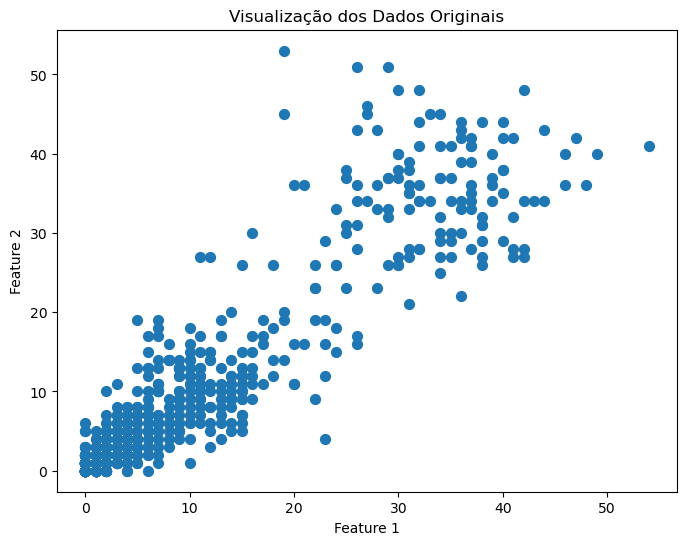

In [51]:
# imprimindo dados originais 
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap='viridis', s=50)
plt.title("Visualização dos Dados Originais")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [52]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
X.isnull().sum()


Valores ausentes por coluna:


W0     0
W1     0
W2     0
W3     0
W4     0
W5     0
W6     0
W7     0
W8     0
W9     0
W10    0
W11    0
W12    0
W13    0
W14    0
W15    0
W16    0
W17    0
W18    0
W19    0
W20    0
W21    0
W22    0
W23    0
W24    0
W25    0
W26    0
W27    0
W28    0
W29    0
W30    0
W31    0
W32    0
W33    0
W34    0
W35    0
W36    0
W37    0
W38    0
W39    0
W40    0
W41    0
W42    0
W43    0
W44    0
W45    0
W46    0
W47    0
W48    0
W49    0
W50    0
W51    0
MIN    0
MAX    0
dtype: int64

In [53]:
# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
X.describe()


Estatísticas descritivas para colunas numéricas:


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026,3.780518,16.308261
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011,6.403214,17.150637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,0.000000,9.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000,4.000000,21.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000,24.000000,73.000000


In [54]:
# normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Função para visualizar os dados e os clusters
def visualizar_dados(X_scaled, kmeans_labels, dbscan_labels, agglo_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, label='K-Means')
    plt.title("Clusters Gerados pelo K-Means")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, label='DBSCAN')
    plt.title("Clusters Gerados pelo DBSCAN")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50, label='Agglomerative')
    plt.title("Clusters Gerados pelo Agglomerative Clustering")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()


In [56]:
# função para determinar melhor parametro para o kmeans
def determinar_melhor_k(data, max_k=10):
    """
    Determina o melhor número de clusters (K) para o K-Means 
    usando o Método do Cotovelo e a Pontuação Silhouette.
    
    Parâmetros:
    - data: array ou DataFrame com os dados a serem clusterizados.
    - max_k: número máximo de clusters a testar (padrão: 10).

    Retorna:
    - Melhor valor de K sugerido pelos métodos.
    """
    distortions = []  # Armazena a soma dos erros quadráticos
    silhouette_scores = []  # Armazena as pontuações Silhouette
    k_values = range(2, max_k + 1)  # Testamos a partir de K=2

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        
        # Método do Cotovelo (Inércia)
        distortions.append(kmeans.inertia_)
        
        # Método da Silhouette (se K > 1)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Plotando o Método do Cotovelo
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, marker='o', linestyle='--')
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Soma dos Erros Quadráticos (Inertia)")
    plt.title("Método do Cotovelo")

    # Plotando o Método da Silhouette
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='s', linestyle='--', color='red')
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.title("Pontuação Silhouette")

    plt.show()

    # Melhor K pelo método da silhouette (maior score)
    melhor_k_silhouette = k_values[np.argmax(silhouette_scores)]
    
    print(f"🔹 Melhor K sugerido pelo Método da Silhouette: {melhor_k_silhouette}")

    return melhor_k_silhouette

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

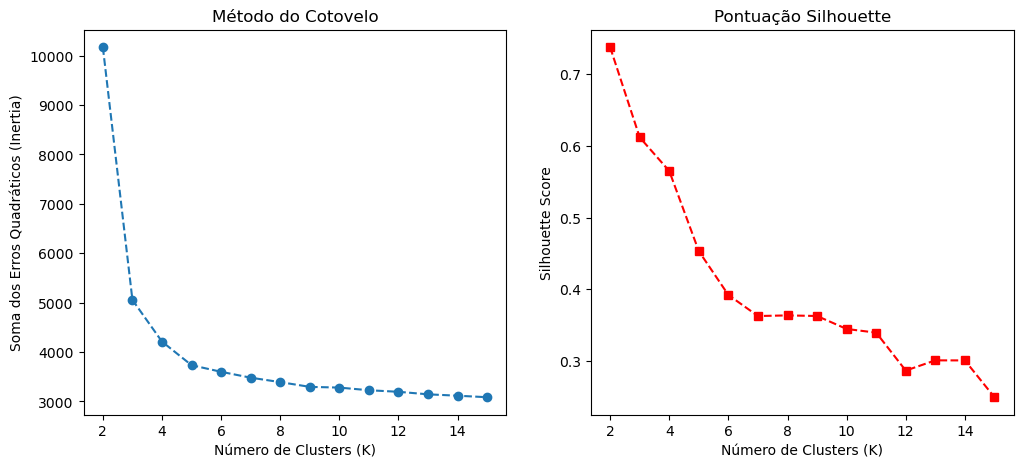

🔹 Melhor K sugerido pelo Método da Silhouette: 2


In [57]:
# Chamando a função de determinar melhor K para mostrar os resultados
melhor_k = determinar_melhor_k(X_scaled, max_k=15)


In [58]:
# função para aplicar o kmeans
def aplicar_kmeans(X_scaled, n_clusters, random_state=42):
    """
    Aplica o algoritmo K-Means aos dados escalados.

    Parâmetros:
    - X_scaled: array com os dados normalizados.
    - n_clusters: número de clusters definido previamente.
    - random_state: semente para reprodutibilidade (padrão: 42).

    Retorna:
    - labels: rótulos atribuídos pelo K-Means.
    - score: pontuação Silhouette.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    
    return labels, score

In [59]:
# função para determinar os melhores parametros para o DBSCAN
def definir_melhores_parametros_dbscan(X_scaled, eps_range, min_samples_range):
    """
    Define os melhores valores de parâmetros para o DBSCAN com base na pontuação Silhouette.

    Parâmetros:
    - X_scaled: array com os dados normalizados.
    - eps_range: lista de valores para o parâmetro eps.
    - min_samples_range: lista de valores para o parâmetro min_samples.

    Retorna:
    - Um dicionário com os melhores valores de eps, min_samples, a melhor pontuação Silhouette e os rótulos correspondentes.
    """
    melhor_score = -1
    melhor_eps = None
    melhor_min_samples = None
    melhor_labels = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            
            # Calcular a pontuação Silhouette apenas se houver mais de um cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_scaled, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_eps = eps
                    melhor_min_samples = min_samples
                    melhor_labels = labels

    return {
        "melhor_eps": melhor_eps,
        "melhor_min_samples": melhor_min_samples,
        "melhor_score": melhor_score,
        "melhor_labels": melhor_labels
    }

In [60]:
# definindo o intervalo de valores
eps_range = np.linspace(0.05, 2.0, 20)  # Intervalo de valores para o parâmetro eps
min_samples_range = range(2, 20, 2)    # Intervalo de valores para o parâmetro min_samples

# chamando a função de melhores parametros para DBSCAN
melhores_parametros_dbscan = definir_melhores_parametros_dbscan(X_scaled, eps_range, min_samples_range)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros para DBSCAN:")
print(f"eps: {melhores_parametros_dbscan['melhor_eps']}")
print(f"min_samples: {melhores_parametros_dbscan['melhor_min_samples']}")
print(f"Silhouette Score: {melhores_parametros_dbscan['melhor_score']}")

Melhores parâmetros para DBSCAN:
eps: 2.0
min_samples: 6
Silhouette Score: 0.5360519562189752


In [61]:
# função de aplicação do DBSCAN
def aplicar_dbscan(X_scaled, eps=0.5, min_samples=5):
    """
    Aplica o algoritmo DBSCAN aos dados escalados.

    Parâmetros:
    - X_scaled: array com os dados normalizados.
    - eps: valor para o raio máximo de um ponto vizinho.
    - min_samples: número mínimo de pontos para formar um cluster.

    Retorna:
    - labels: rótulos atribuídos pelo DBSCAN.
    - score: pontuação Silhouette (se houver mais de um cluster).
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    # Exibir os rótulos para depuração
    print(f"eps={eps}, min_samples={min_samples}, labels={set(labels)}")

    # Calcular a pontuação Silhouette apenas se houver pelo menos dois clusters distintos
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Desconsidera ruído (-1)
    score = silhouette_score(X_scaled, labels) if n_clusters > 1 else -1

    return labels, score

In [62]:
def definir_melhores_parametros_agglomerative(X_scaled, cluster_range, linkage_options):
    """
    Define os melhores parâmetros para o AgglomerativeClustering com base na pontuação Silhouette.

    Parâmetros:
    - X_scaled: array com os dados normalizados.
    - cluster_range: intervalo de valores para o número de clusters.
    - linkage_options: lista de opções de linkage ('ward', 'complete', 'average', 'single').

    Retorna:
    - Um dicionário com os melhores valores de número de clusters, método de linkage, 
      a melhor pontuação Silhouette e os rótulos correspondentes.
    """
    melhor_score = -1
    melhor_n_clusters = None
    melhor_linkage = None
    melhor_labels = None

    for n_clusters in cluster_range:
        for linkage in linkage_options:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = agglo.fit_predict(X_scaled)
            
            # Calcular a pontuação Silhouette apenas se houver mais de um cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_scaled, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_n_clusters = n_clusters
                    melhor_linkage = linkage
                    melhor_labels = labels

    return {
        "melhor_n_clusters": melhor_n_clusters,
        "melhor_linkage": melhor_linkage,
        "melhor_score": melhor_score,
        "melhor_labels": melhor_labels
    }

In [63]:
# Definir os intervalos de valores para os parâmetros
cluster_range = range(2, 10)  # Intervalo de número de clusters
linkage_options = ['ward', 'complete', 'average', 'single']  # Opções de linkage

# Chamar a função para encontrar os melhores parâmetros
melhores_parametros_agglomerative = definir_melhores_parametros_agglomerative(X_scaled, cluster_range, linkage_options)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros para Agglomerative Clustering:")
print(f"Número de Clusters: {melhores_parametros_agglomerative['melhor_n_clusters']}")
print(f"Método de Linkage: {melhores_parametros_agglomerative['melhor_linkage']}")
print(f"Silhouette Score: {melhores_parametros_agglomerative['melhor_score']}")

Melhores parâmetros para Agglomerative Clustering:
Número de Clusters: 2
Método de Linkage: complete
Silhouette Score: 0.7500116515836492


In [64]:
# função para aplicar Agglomerative Clustering
def aplicar_agglomerative(X_scaled, n_clusters, linkage='ward'):
    """
    Aplica o Agglomerative Clustering aos dados escalados.

    Parâmetros:
    - X_scaled: array com os dados normalizados.
    - n_clusters: número de clusters definido previamente.
    - linkage: método de linkage ('ward', 'complete', 'average' ou 'single').

    Retorna:
    - labels: rótulos atribuídos pelo Agglomerative Clustering.
    - score: pontuação Silhouette.
    """
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agglo.fit_predict(X_scaled)

    # Calcular a pontuação Silhouette
    score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1

    return labels, score

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


eps=2.0, min_samples=6, labels={0, -1}

🔹 Silhouette Scores:
K-Means: 0.73791229767257
DBSCAN: -1
Hierárquico Aglomerativo: 0.7500116515836492


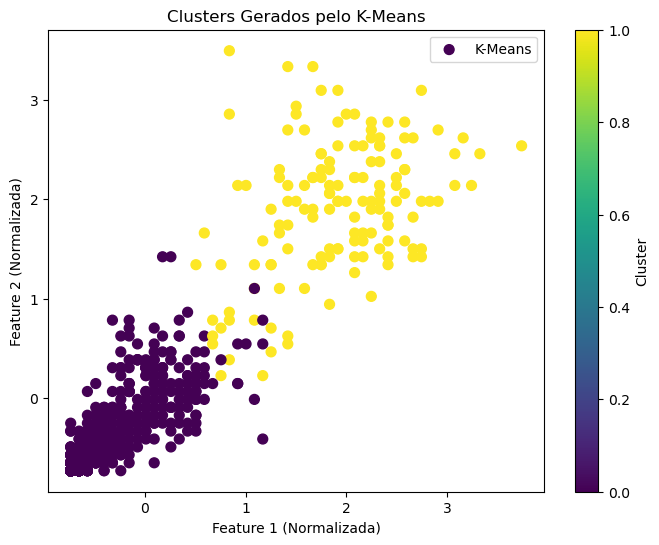

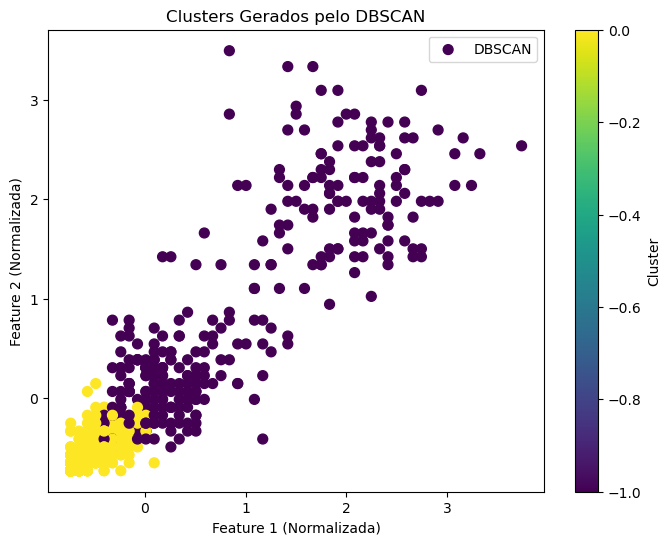

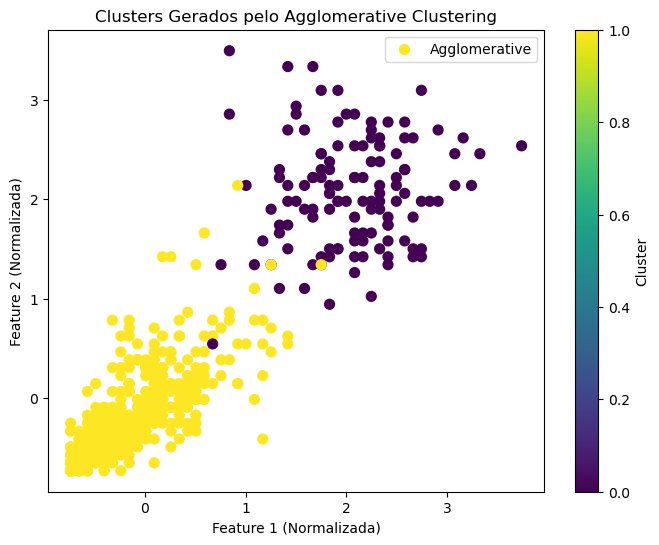

In [65]:
# Garantir que os melhores parâmetros para K-Means foram encontrados
if melhor_k is not None:
    kmeans_labels, kmeans_score = aplicar_kmeans(X_scaled, n_clusters=melhor_k)
else:
    kmeans_labels, kmeans_score = None, None

# Garantir que os melhores parâmetros para DBSCAN foram encontrados
if melhores_parametros_dbscan["melhor_eps"] is not None and melhores_parametros_dbscan["melhor_min_samples"] is not None:
    dbscan_labels, dbscan_score = aplicar_dbscan(
        X_scaled, 
        eps=melhores_parametros_dbscan["melhor_eps"], 
        min_samples=melhores_parametros_dbscan["melhor_min_samples"]
    )
else:
    dbscan_labels, dbscan_score = None, None

# Garantir que os melhores parâmetros para Agglomerative Clustering foram encontrados
if melhores_parametros_agglomerative["melhor_n_clusters"] is not None and melhores_parametros_agglomerative["melhor_linkage"] is not None:
    agglo_labels, agglo_score = aplicar_agglomerative(
        X_scaled, 
        n_clusters=melhores_parametros_agglomerative["melhor_n_clusters"], 
        linkage=melhores_parametros_agglomerative["melhor_linkage"]
    )
else:
    agglo_labels, agglo_score = None, None

# Comparar os resultados
print("\n🔹 Silhouette Scores:")
print(f"K-Means: {kmeans_score if kmeans_score is not None else 'Não calculado'}")
print(f"DBSCAN: {dbscan_score if dbscan_score is not None else 'Não calculado'}")
print(f"Hierárquico Aglomerativo: {agglo_score if agglo_score is not None else 'Não calculado'}")

# Visualizar os dados e clusters (somente se os rótulos forem válidos)
visualizar_dados(
    X_scaled, 
    *(label for label in [kmeans_labels, dbscan_labels, agglo_labels] if label is not None)
)


In [67]:
# aplicação de validação cruzada
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, rand_score

def validar_clusters(X_scaled, labels_dict, true_labels=None):
    """
    Valida os clusters gerados usando diferentes métricas de avaliação.

    Parâmetros:
    - X_scaled: array com os dados normalizados.
    - labels_dict: dicionário contendo os rótulos dos clusters gerados por diferentes algoritmos.
    - true_labels: array contendo os rótulos verdadeiros (opcional, necessário para Rand Index).

    Retorna:
    - Um dicionário com as métricas calculadas para cada algoritmo.
    """
    resultados = {}

    for algoritmo, labels in labels_dict.items():
        if len(set(labels)) > 1:  # Garantir que há mais de um cluster
            silhouette = silhouette_score(X_scaled, labels)
            calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
            davies_bouldin = davies_bouldin_score(X_scaled, labels)

            # Calcular Rand Index apenas se os rótulos verdadeiros forem fornecidos
            rand_index = rand_score(true_labels, labels) if true_labels is not None else None
        else:
            silhouette = calinski_harabasz = davies_bouldin = rand_index = None

        resultados[algoritmo] = {
            "Silhouette Score": silhouette,
            "Calinski-Harabasz Index": calinski_harabasz,
            "Davies-Bouldin Index": davies_bouldin,
            "Rand Index": rand_index if true_labels is not None else "Não aplicável"
        }

    return resultados

# Dicionário com os rótulos dos clusters gerados
labels_dict = {
    "K-Means": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "Agglomerative": agglo_labels
}

# Validar os clusters (substitua `true_labels` pelos rótulos reais se disponíveis)
resultados_validacao = validar_clusters(X_scaled, labels_dict, true_labels=None)

# Exibir os resultados
for algoritmo, metricas in resultados_validacao.items():
    print(f"\n🔹 {algoritmo}:")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor if valor is not None else 'Não aplicável'}")



🔹 K-Means:
Silhouette Score: 0.73791229767257
Calinski-Harabasz Index: 2674.810522020141
Davies-Bouldin Index: 0.45046329881468705
Rand Index: Não aplicável

🔹 DBSCAN:
Silhouette Score: 0.5360519562189752
Calinski-Harabasz Index: 1051.4878009850424
Davies-Bouldin Index: 0.7493664508735947
Rand Index: Não aplicável

🔹 Agglomerative:
Silhouette Score: 0.7500116515836492
Calinski-Harabasz Index: 2644.903907782741
Davies-Bouldin Index: 0.3990566944168734
Rand Index: Não aplicável


Silhouette Score: Mede a separação entre clusters e a coesão dentro deles (quanto maior, melhor).

Calinski-Harabasz Index: Avalia a compactação e separação dos clusters (quanto maior, melhor).

Davies-Bouldin Index: Indica o quão sobrepostos e mal definidos os clusters estão (quanto menor, melhor).


| Algoritmo       | Silhouette Score (↑) | CH Index (↑) | DB Index (↓) |
|------------------|-----------------------|--------------|--------------|
| **K-Means**     | 0.7379                | 2674.81 ✅    | 0.4505       |
| **DBSCAN**      | 0.5360                | 1051.49      | 0.7494       |
| **Agglomerative** | 0.7500 ✅            | 2644.90      | 0.3990 ✅    |

**Comparação geral:**

- **Agglomerative Clustering** teve o melhor Silhouette Score e o menor Davies-Bouldin Index, sugerindo que seus clusters são mais bem definidos e separados.
- **K-Means** teve o melhor CH Index, indicando clusters bem compactos e separados.
- **DBSCAN** teve os piores scores, indicando que pode não ter sido o melhor método para esse conjunto de dados.

**Recomendação:**

O melhor algoritmo parece ser o **Agglomerative Clustering**, pois ele teve os melhores valores gerais, mas **K-Means** também teve um bom desempenho e pode ser uma alternativa. 

Possíveis Aplicações
Segmentação de Clientes: Identificar grupos de clientes com padrões de compra semelhantes.
Análise de Produtos: Agrupar produtos com base em padrões de vendas semanais.
Previsão de Demanda: Usar os clusters para prever tendências de vendas.
Otimização de Estoque: Ajustar o estoque com base nos padrões de vendas identificados.